In [ ]:
Assignment 4: Emotion Recognition from Faces
Dataset: FER-2013 (35,887 grayscale face images with 7 emotions: angry, happy, sad, surprise, etc.)
Task:
Build a CNN model to classify emotions from facial expressions.
Apply data augmentation and use Dropout layers to prevent overfitting.
Visualize the training process.
Expected Outcomes:
Achieve at least 60-70% accuracy.
Display confusion matrix and visualize misclassifications.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 60.3M/60.3M [00:07<00:00, 8.88MB/s]

Extracting files...


Path to dataset files: C:\Users\Saswata Maity\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [1]:
train_path=r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\msambare\fer2013\versions\1\train"
test_path=r"C:\Users\Saswata Maity\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test"

In [2]:
import os
import shutil
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

# Dataset
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [94]:
# Initialize Image Data Generator
data_generator = ImageDataGenerator(
    rescale=1/255.,
    validation_split=0.1
)

# Load Training Data
train_data = data_generator.flow_from_directory(
    train_path,
    target_size=(32,32),
    batch_size=64,
    shuffle=True,
    color_mode='grayscale',
    subset='training',
    seed=42
)

# Load Validation Data
valid_data = data_generator.flow_from_directory(
    train_path,
    target_size=(32,32),
    batch_size=64,
    shuffle=True,
    color_mode='grayscale',
    subset='validation',
    seed=42
)

# Load Testing Data
test_data = data_generator.flow_from_directory(
    test_path,
    target_size=(32,32),
    batch_size=64,
    color_mode='grayscale',
    shuffle=False,
    seed=42
)

Found 25841 images belonging to 7 classes.
Found 2868 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
data_aug=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomFlip('vertical')
    ]
)

In [127]:
from tensorflow.keras import regularizers

model=tf.keras.Sequential(
    [
        tf.keras.Input(shape=(32,32,1)),
        #data_aug,
        tf.keras.layers.Conv2D(16,3,activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(16,3,activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(16,3,activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.0005)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,3,activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32,3,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        #tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Conv2D(64,3,activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64,3,activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Conv2D(128,3,activation='relu'),
        tf.keras.layers.Conv2D(64,3,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Dropout(0.2),
       # tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        #tf.keras.layers.Conv2D(64,3,activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(512,activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
        tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.0005)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(7,activation='softmax')    ]
)

In [128]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.95),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [129]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_194 (Conv2D)         (None, 32, 32, 16)        160       
                                                                 
 batch_normalization_63 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_195 (Conv2D)         (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_64 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_196 (Conv2D)         (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_65 (Bat  (None, 32, 32, 16)     

In [130]:
history=model.fit(train_data,epochs=45,batch_size=64,validation_data=valid_data,verbose=2)

Epoch 1/45
404/404 - 12s - loss: 2.2317 - accuracy: 0.2297 - val_loss: 2.1557 - val_accuracy: 0.2528 - 12s/epoch - 30ms/step
Epoch 2/45
404/404 - 11s - loss: 2.1417 - accuracy: 0.2640 - val_loss: 2.0744 - val_accuracy: 0.3013 - 11s/epoch - 27ms/step
Epoch 3/45
404/404 - 10s - loss: 2.0714 - accuracy: 0.3030 - val_loss: 2.0548 - val_accuracy: 0.3281 - 10s/epoch - 24ms/step
Epoch 4/45
404/404 - 11s - loss: 2.0049 - accuracy: 0.3386 - val_loss: 1.9178 - val_accuracy: 0.3954 - 11s/epoch - 27ms/step
Epoch 5/45
404/404 - 10s - loss: 1.9385 - accuracy: 0.3705 - val_loss: 1.8861 - val_accuracy: 0.4031 - 10s/epoch - 25ms/step
Epoch 6/45
404/404 - 10s - loss: 1.8845 - accuracy: 0.3965 - val_loss: 1.8271 - val_accuracy: 0.4254 - 10s/epoch - 25ms/step
Epoch 7/45
404/404 - 10s - loss: 1.8408 - accuracy: 0.4094 - val_loss: 1.8287 - val_accuracy: 0.4320 - 10s/epoch - 25ms/step
Epoch 8/45
404/404 - 11s - loss: 1.7946 - accuracy: 0.4257 - val_loss: 1.7514 - val_accuracy: 0.4407 - 11s/epoch - 27ms/step


In [131]:
loss,acc=model.evaluate(test_data)

113/113 [==============================] - 3s 26ms/step - loss: 1.5297 - accuracy: 0.5666


In [132]:
print(f'Model accuracy : {acc*100 :.2f} %')

Model accuracy : 56.66 %


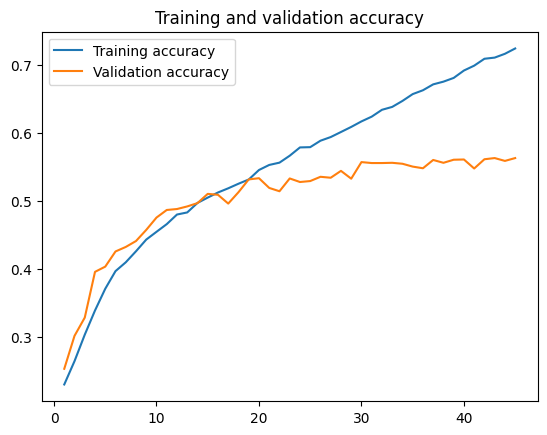

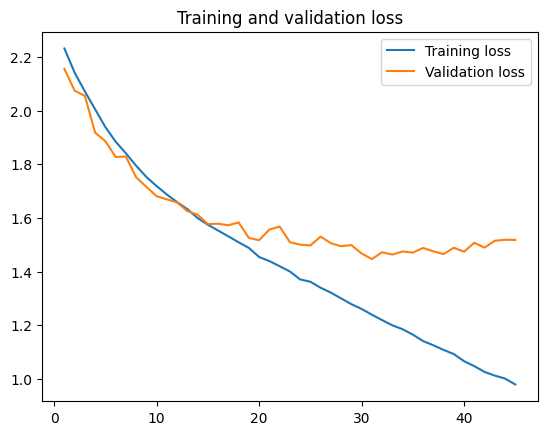

In [133]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label="Training accuracy")
plt.plot(epochs, val_accuracy, label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [134]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get true labels from the test data
y_true = test_data.classes

# Get model predictions (probabilities) and convert to class labels
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute and print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute and print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

113/113 [==============================] - 3s 25ms/step
Confusion Matrix:
[[ 439   18  112   59  119  193   18]
 [  32   42   14    4    4   15    0]
 [ 107   11  350   67  128  274   87]
 [  64    1   56 1429  102   89   33]
 [  73    6  102  120  651  252   29]
 [ 128    6  165  119  232  584   13]
 [  21    1  143   50   20   24  572]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48       958
           1       0.49      0.38      0.43       111
           2       0.37      0.34      0.36      1024
           3       0.77      0.81      0.79      1774
           4       0.52      0.53      0.52      1233
           5       0.41      0.47      0.44      1247
           6       0.76      0.69      0.72       831

    accuracy                           0.57      7178
   macro avg       0.55      0.52      0.53      7178
weighted avg       0.57      0.57      0.57      7178



57% accuracy with 7178 support misclassifcations about 3000 images so cannot vizualize